In [302]:
# ! pip install ipynb
from ipynb.fs.full.my_functions import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

In [303]:
ilc = pd.read_csv(r'C:\Users\dvale\TFM\Data\ilc.csv', low_memory=False)

unflaged_columns = unflag(ilc.columns)
ilc = ilc[unflaged_columns]

ilc = ilc.drop(irrelevant_columns, axis=1)

In [304]:
data = pd.DataFrame({'id': ilc['Personal ID'], 
                     'weight': ilc['Personal cross-sectional weight'], 
                     'material_deprivation': ilc['Household endures severe material deprivation']})

In [305]:
data['annual_income'] = ilc['Total disposable household income including imputed rent']

In [306]:
data['consumption_unit'] = ilc['Consumption unit']

In [307]:
data['adjusted_income'] = data.annual_income / data.consumption_unit

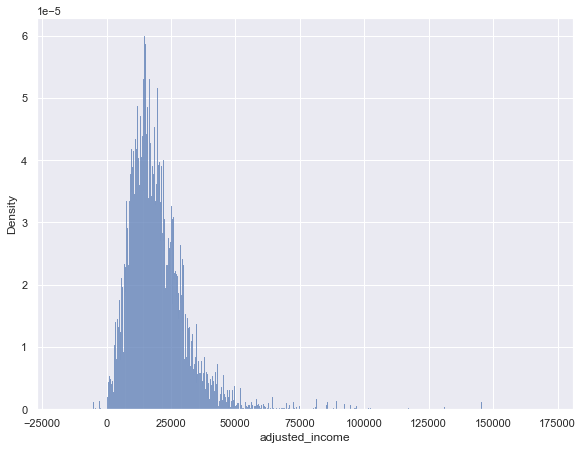

In [308]:
histplot(x='adjusted_income', data=data, bins=1000)

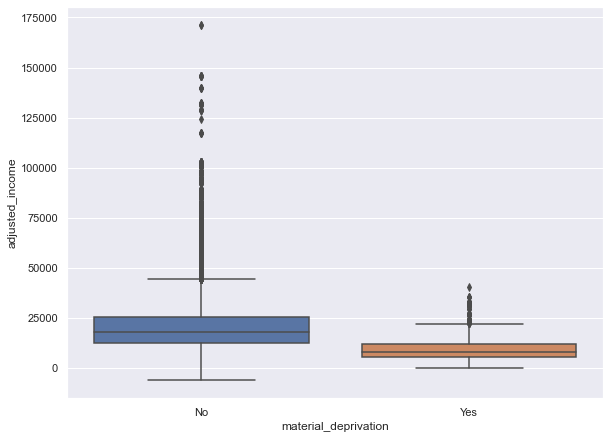

In [309]:
boxplot(x='material_deprivation', y='adjusted_income', data=data)

In [310]:
data['minimum_income'] = ilc['Lowest monthly income to make ends meet'].apply(lambda x: 
                                                                              float(x[3:] if x != '          ' else np.nan))

In [311]:
data.minimum_income = data.minimum_income.fillna(data.minimum_income.median()) * 12

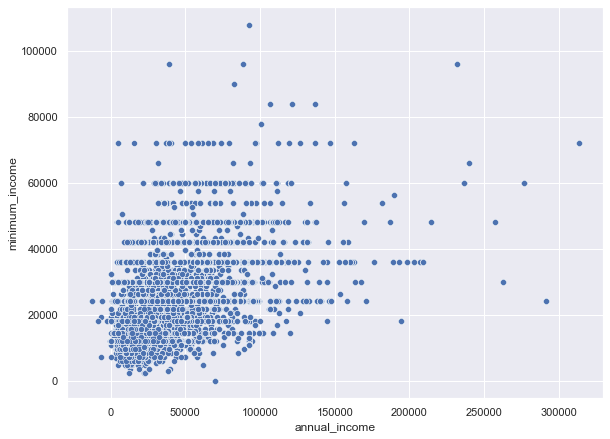

In [312]:
scatterplot(x='annual_income', y='minimum_income', data=data)

In [313]:
data['kapteyn_line'] = data.apply(lambda row: 'Below' if row['annual_income'] < row['minimum_income'] else 'Above', axis=1)

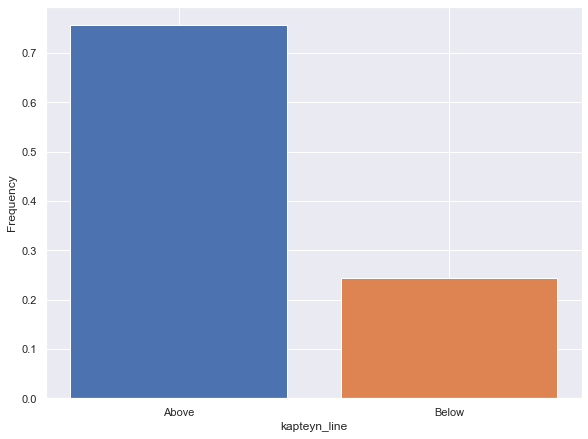

In [314]:
barplot(x='kapteyn_line', data=data)

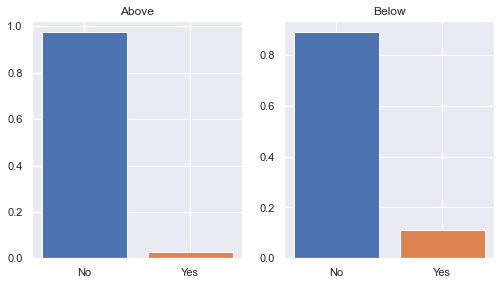

In [315]:
bardiagram(x='kapteyn_line', hue='material_deprivation', data=data)

In [316]:
poverty_threshold = data.adjusted_income.median() * 0.6

In [317]:
data['risk_poverty'] = data.apply(lambda row: 'Yes' 
                                       if row['adjusted_income'] < poverty_threshold
                                       else 'No', axis=1)

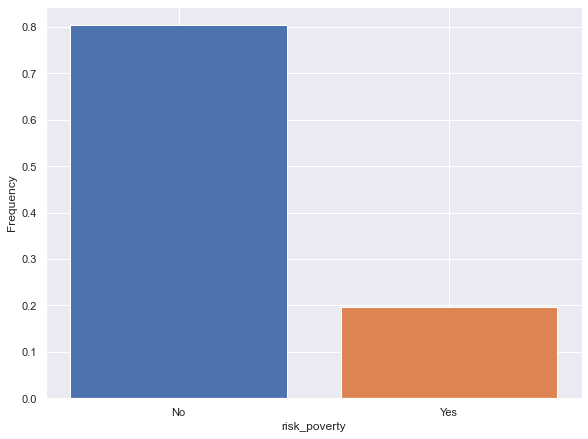

In [318]:
barplot(x='risk_poverty', data=data)

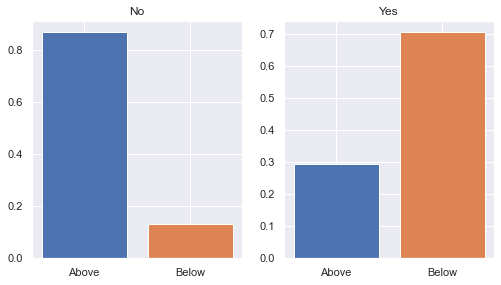

In [319]:
bardiagram(x='risk_poverty', hue='kapteyn_line', data=data)

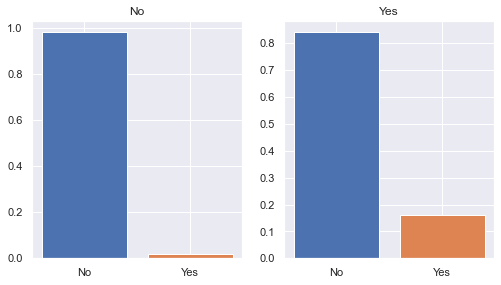

In [320]:
bardiagram(x='risk_poverty', hue='material_deprivation', data=data)

In [321]:
data['id_head'] = ilc['Person 1 responsible for the accommodation']

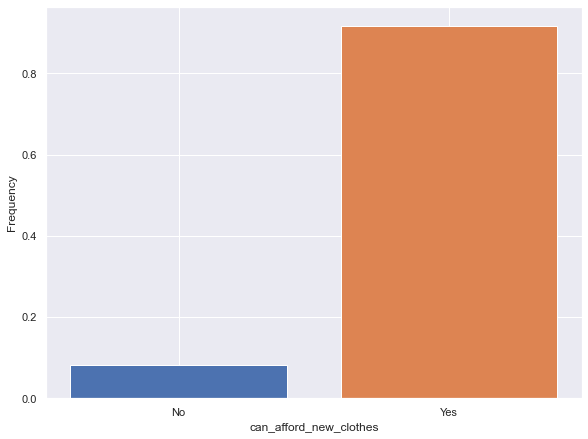

In [322]:
data['can_afford_new_clothes'] = ilc['Can replace damaged clothes for new clothes'].map({'Yes': 'Yes', 
                                                                                         'No (other reason)': 'Yes',
                                                                                         'No (cannot afford it)': 'No'})

data.can_afford_new_clothes = data.can_afford_new_clothes.fillna('Missing')
data.can_afford_new_clothes = get_parent('id_head', 'can_afford_new_clothes', data)
data.can_afford_new_clothes = data.apply(lambda row: data.can_afford_new_clothes.mode()[0] 
                                         if row['can_afford_new_clothes'] == 'Missing'
                                         else row['can_afford_new_clothes'],
                                         axis=1)

barplot(x='can_afford_new_clothes', data=data)

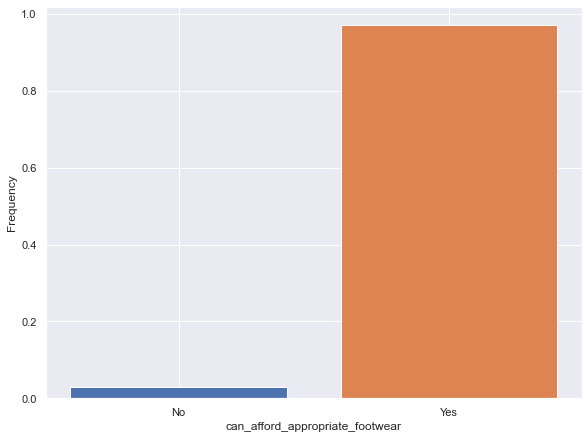

In [323]:
data['can_afford_appropriate_footwear'] = ilc['Has appropriate footwear for every season'].map({'Yes': 'Yes', 
                                                                                                'No (other reason)': 'Yes',
                                                                                                'No (cannot afford it)': 'No'})

data.can_afford_appropriate_footwear = data.can_afford_appropriate_footwear.fillna('Missing')
data.can_afford_appropriate_footwear = get_parent('id_head', 'can_afford_appropriate_footwear', data)
data.can_afford_appropriate_footwear = data.apply(lambda row: data.can_afford_appropriate_footwear.mode()[0] 
                                                  if row['can_afford_appropriate_footwear'] == 'Missing'
                                                  else row['can_afford_appropriate_footwear'],
                                                  axis=1)

barplot(x='can_afford_appropriate_footwear', data=data)

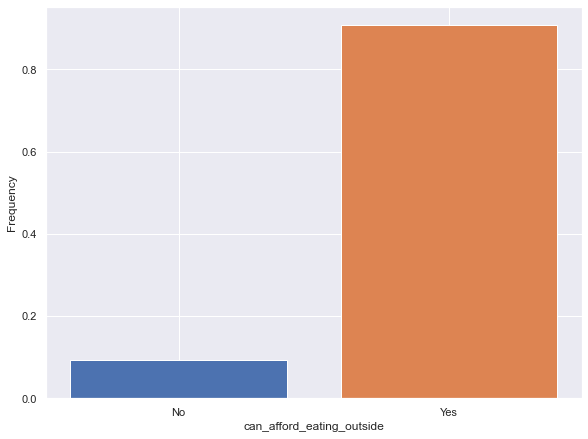

In [324]:
data['can_afford_eating_outside'] = ilc['Meets friends or family to eat or have drinks at least once a month'].map({'Yes': 'Yes', 
                                                                                                                    'No (other reason)': 'Yes',
                                                                                                                    'No (cannot afford it)': 'No'})

data.can_afford_eating_outside = data.can_afford_eating_outside.fillna('Missing')
data.can_afford_eating_outside = get_parent('id_head', 'can_afford_eating_outside', data)
data.can_afford_eating_outside = data.apply(lambda row: data.can_afford_eating_outside.mode()[0] 
                                            if row['can_afford_eating_outside'] == 'Missing'
                                            else row['can_afford_eating_outside'],
                                            axis=1)

barplot(x='can_afford_eating_outside', data=data)

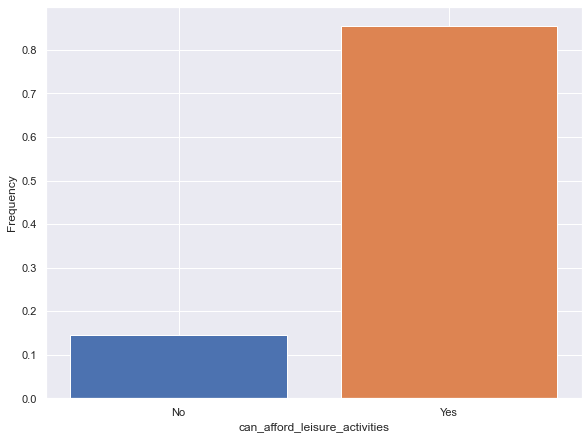

In [325]:
data['can_afford_leisure_activities'] = ilc['Regularly takes part in leisure activities such as playing sports, going to the movies, concerts, etc'].map({'Yes': 'Yes', 
                                                                                                                                                          'No (other reason)': 'Yes',
                                                                                                                                                          'No (cannot afford it)': 'No'})

data.can_afford_leisure_activities = data.can_afford_leisure_activities.fillna('Missing')
data.can_afford_leisure_activities = get_parent('id_head', 'can_afford_leisure_activities', data)
data.can_afford_leisure_activities = data.apply(lambda row: data.can_afford_leisure_activities.mode()[0] 
                                            if row['can_afford_leisure_activities'] == 'Missing'
                                            else row['can_afford_leisure_activities'],
                                            axis=1)

barplot(x='can_afford_leisure_activities', data=data)

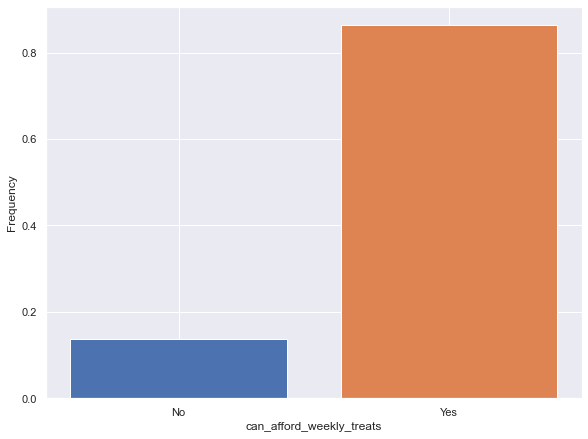

In [326]:
data['can_afford_weekly_treats'] = ilc['Spends money on treating one-self every week'].map({'Yes': 'Yes', 
                                                                                            'No (other reason)': 'Yes',
                                                                                            'No (cannot afford it)': 'No'})

data.can_afford_weekly_treats = data.can_afford_weekly_treats.fillna('Missing')
data.can_afford_weekly_treats = get_parent('id_head', 'can_afford_weekly_treats', data)
data.can_afford_weekly_treats = data.apply(lambda row: data.can_afford_weekly_treats.mode()[0] 
                                            if row['can_afford_weekly_treats'] == 'Missing'
                                            else row['can_afford_weekly_treats'],
                                            axis=1)

barplot(x='can_afford_weekly_treats', data=data)

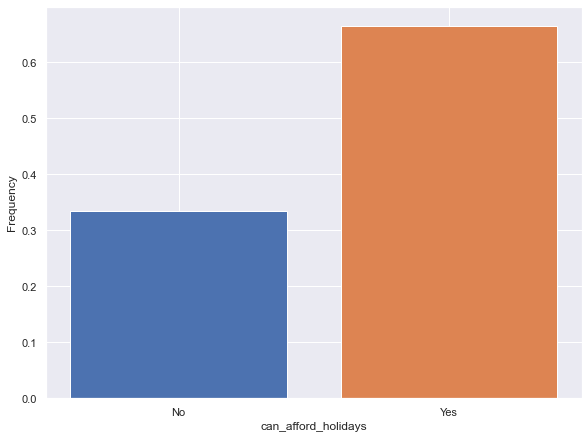

In [327]:
data['can_afford_holidays'] = ilc['Capacity to afford paying for one week annual holiday away from home']
data.can_afford_holidays = data.can_afford_holidays.fillna(data.can_afford_holidays.mode()[0])

barplot(x='can_afford_holidays', data=data)

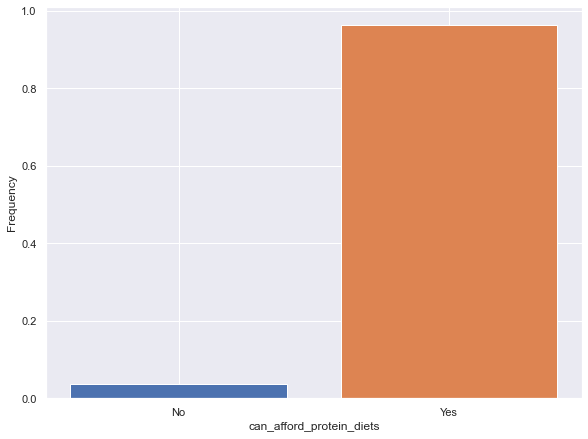

In [328]:
data['can_afford_protein_diets'] = ilc['Capacity to afford a meal with meat, chicken, fish (or vegetarian equivalent) every second day']
data.can_afford_protein_diets = data.can_afford_protein_diets.fillna(data.can_afford_protein_diets.mode()[0])

barplot(x='can_afford_protein_diets', data=data)

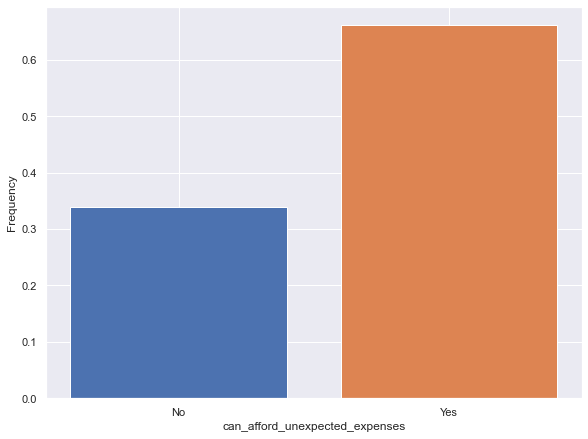

In [329]:
data['can_afford_unexpected_expenses'] = ilc['Capacity to face unexpected financial expenses']
data.can_afford_unexpected_expenses = data.can_afford_unexpected_expenses.fillna(data.can_afford_unexpected_expenses.mode()[0])

barplot(x='can_afford_unexpected_expenses', data=data)

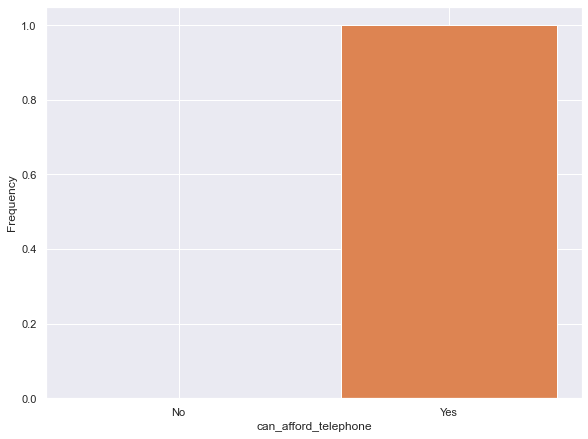

In [330]:
data['can_afford_telephone'] = ilc['Do you have a telephone (including mobile phone)?'].map({'Yes': 'Yes', 
                                                                                             'No (other reason)': 'Yes',
                                                                                             'No (cannot afford it)': 'No'})

data.can_afford_telephone = data.can_afford_telephone.fillna(data.can_afford_telephone.mode()[0])

barplot(x='can_afford_telephone', data=data)

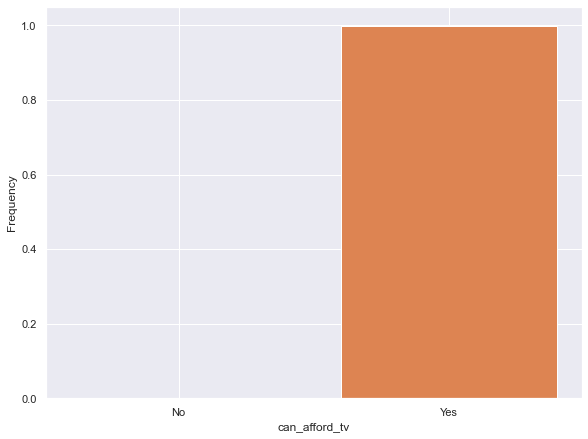

In [331]:
data['can_afford_tv'] = ilc['Do you have a colour TV?'].map({'Yes': 'Yes', 
                                                             'No (other reason)': 'Yes',
                                                             'No (cannot afford it)': 'No'})

data.can_afford_tv = data.can_afford_tv.fillna(data.can_afford_tv.mode()[0])

barplot(x='can_afford_tv', data=data)

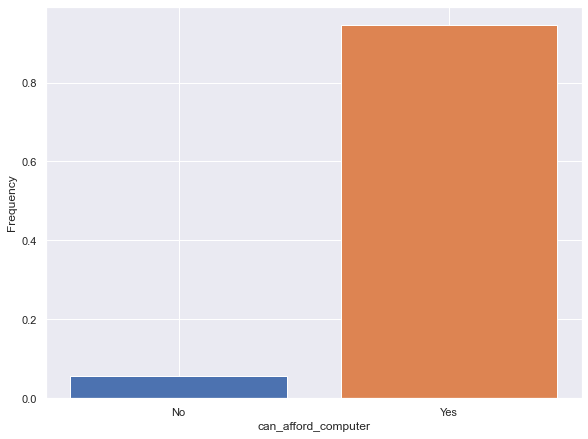

In [332]:
data['can_afford_computer'] = ilc['Do you have a computer?'].map({'Yes': 'Yes', 
                                                                  'No (other reason)': 'Yes',
                                                                  'No (cannot afford it)': 'No'})

data.can_afford_computer = data.can_afford_computer.fillna(data.can_afford_computer.mode()[0])

barplot(x='can_afford_computer', data=data)

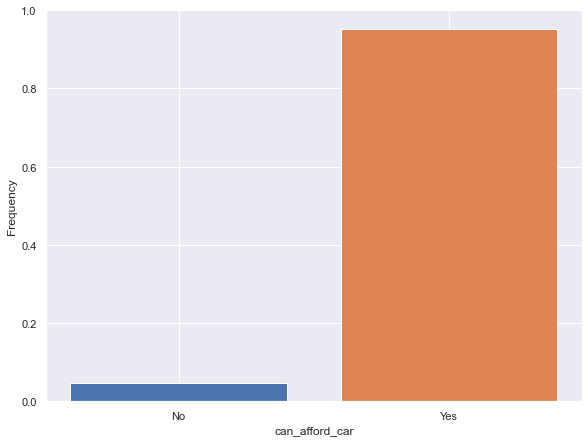

In [333]:
data['can_afford_car'] = ilc['Do you have a car?'].map({'Yes': 'Yes', 
                                                        'No (other reason)': 'Yes',
                                                        'No (cannot afford it)': 'No'})

data.can_afford_car = data.can_afford_car.fillna(data.can_afford_car.mode()[0])

barplot(x='can_afford_car', data=data)

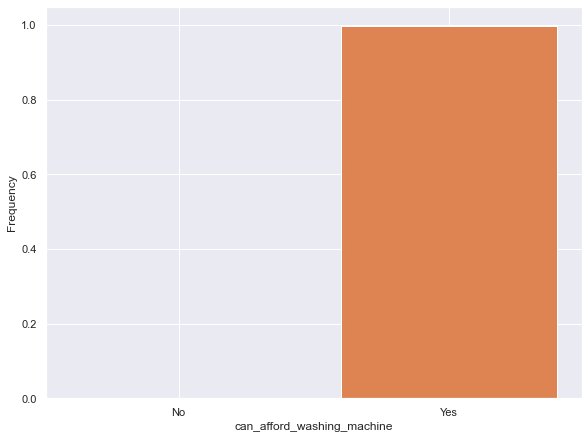

In [334]:
data['can_afford_washing_machine'] = ilc['Do you have a washing machine?'].map({'Yes': 'Yes', 
                                                                                'No (other reason)': 'Yes',
                                                                                'No (cannot afford it)': 'No'})

data.can_afford_washing_machine = data.can_afford_washing_machine.fillna(data.can_afford_washing_machine.mode()[0])

barplot(x='can_afford_washing_machine', data=data)

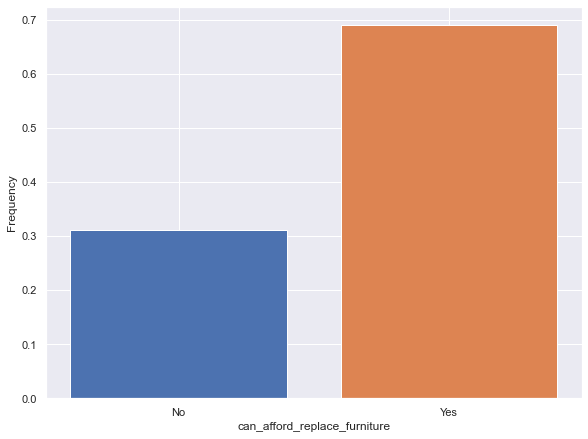

In [335]:
data['can_afford_replace_furniture'] = ilc['Can afford to replace damaged furniture'].map({'Yes': 'Yes', 
                                                                                           'No (other reason)': 'Yes',
                                                                                           'No (cannot afford it)': 'No'})

data.can_afford_replace_furniture = data.can_afford_replace_furniture.fillna(data.can_afford_replace_furniture.mode()[0])

barplot(x='can_afford_replace_furniture', data=data)

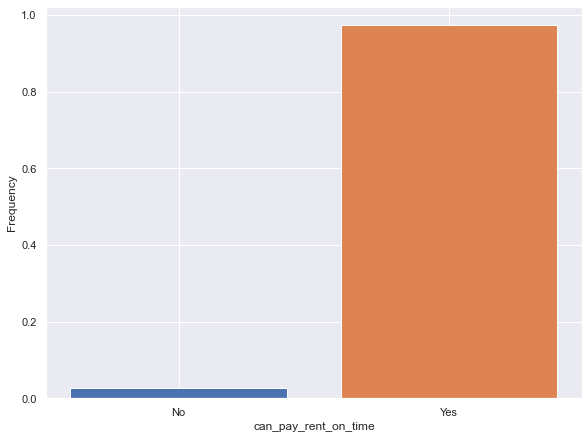

In [336]:
data['can_pay_rent_on_time'] = ilc['Arrears on mortgage or rental payments'].map({'No': 'Yes', 
                                                                                  'Yes, once': 'Yes',
                                                                                  'Yes, twice or more': 'No'})

data.can_pay_rent_on_time = data.can_pay_rent_on_time.fillna(data.can_pay_rent_on_time.mode()[0])

barplot(x='can_pay_rent_on_time', data=data)

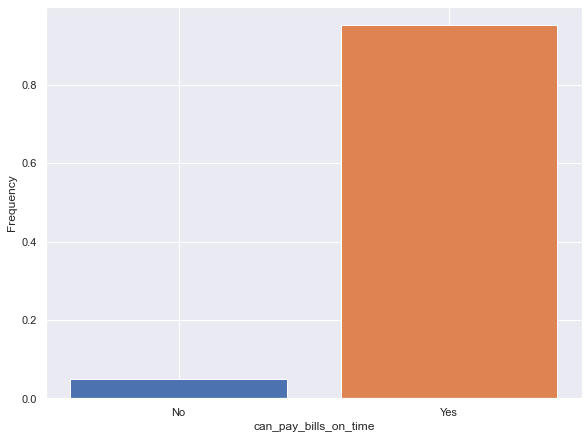

In [337]:
data['can_pay_bills_on_time'] = ilc['Arrears on utility bills'].map({'No': 'Yes', 
                                                                     'Yes, once': 'Yes',
                                                                     'Yes, twice or more': 'No'})

data.can_pay_bills_on_time = data.can_pay_bills_on_time.fillna(data.can_pay_bills_on_time.mode()[0])

barplot(x='can_pay_bills_on_time', data=data)

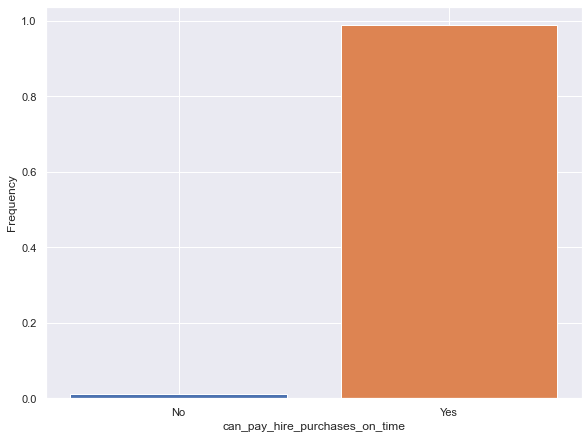

In [338]:
data['can_pay_hire_purchases_on_time'] = ilc['Arrears on hire purchase installments or other loan payments'].map({'No': 'Yes', 
                                                                                                                  'Yes, once': 'Yes',
                                                                                                                  'Yes, twice or more': 'No'})

data.can_pay_hire_purchases_on_time = data.can_pay_hire_purchases_on_time.fillna(data.can_pay_hire_purchases_on_time.mode()[0])

barplot(x='can_pay_hire_purchases_on_time', data=data)

In [339]:
poverty_score_ratios = {c: weighted_freq(data, data[c])['Yes'] for c in data.columns[10:]}

In [340]:
poverty_score_ratios

{'can_afford_new_clothes': 0.9175964003339453,
 'can_afford_appropriate_footwear': 0.9699287015896085,
 'can_afford_eating_outside': 0.9069459930280197,
 'can_afford_leisure_activities': 0.8557733718422199,
 'can_afford_weekly_treats': 0.8628180340373905,
 'can_afford_holidays': 0.6655702365098497,
 'can_afford_protein_diets': 0.962254574628593,
 'can_afford_unexpected_expenses': 0.6611251667662136,
 'can_afford_telephone': 0.9993143094886258,
 'can_afford_tv': 0.9996071901346901,
 'can_afford_computer': 0.94443839093852,
 'can_afford_car': 0.9531383821417836,
 'can_afford_washing_machine': 0.9986820969476405,
 'can_afford_replace_furniture': 0.6895470562685352,
 'can_pay_rent_on_time': 0.9730149158791865,
 'can_pay_bills_on_time': 0.9512710647306716,
 'can_pay_hire_purchases_on_time': 0.9877754570836194}

In [341]:
poverty_score = []

for i in range(len(data)):
    score = 0
    for c in data.columns[10:]:
        if data.iloc[i][c] == 'No':
            score += 1 * poverty_score_ratios[c]
    poverty_score.append(score)

In [342]:
data['poverty_score'] = poverty_score

In [343]:
data.head()

,id,weight,material_deprivation,annual_income,consumption_unit,adjusted_income,minimum_income,kapteyn_line,risk_poverty,id_head,...,can_afford_telephone,can_afford_tv,can_afford_computer,can_afford_car,can_afford_washing_machine,can_afford_replace_furniture,can_pay_rent_on_time,can_pay_bills_on_time,can_pay_hire_purchases_on_time,poverty_score
0,101,906.15830,No,36628.11,1.5,24418.740,21600.0,Above,No,101,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.000000
1,102,906.15830,No,36628.11,1.5,24418.740,21600.0,Above,No,101,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.000000
2,201,1227.68869,No,46892.22,1.5,31261.480,24000.0,Above,No,201,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.000000
3,202,1227.68869,No,46892.22,1.5,31261.480,24000.0,Above,No,201,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.000000
4,301,2559.35987,No,12015.61,2.0,6007.805,13200.0,Below,Yes,301,...,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,5.603701


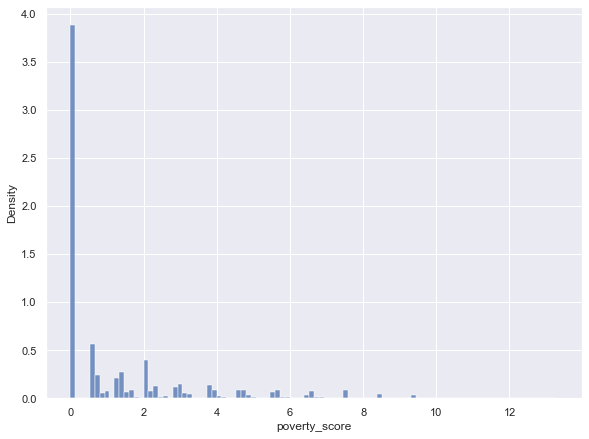

In [344]:
histplot(x='poverty_score', data=data, bins=100)

In [345]:
sorted(data.poverty_score.unique())[:20]

[0.0,
 0.6611251667662136,
 0.6655702365098497,
 0.6895470562685352,
 0.8557733718422199,
 0.8628180340373905,
 0.9069459930280197,
 0.9175964003339453,
 0.94443839093852,
 0.9512710647306716,
 0.9531383821417836,
 0.962254574628593,
 0.9699287015896085,
 0.9730149158791865,
 0.9877754570836194,
 1.3266954032760632,
 1.3506722230347488,
 1.355117292778385,
 1.5168985386084335,
 1.5213436083520695]

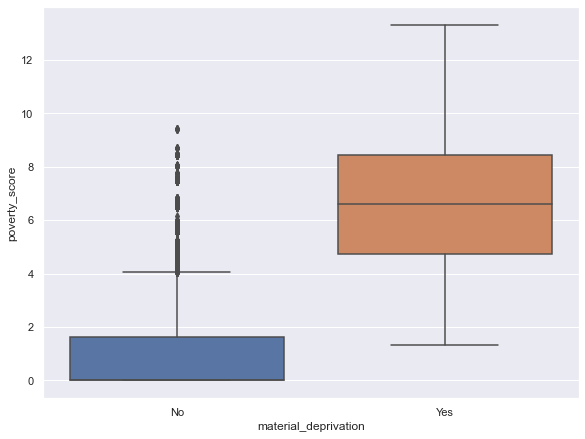

In [346]:
boxplot(x='material_deprivation', y='poverty_score', data=data)

In [351]:
data[data.material_deprivation == 'Yes'].poverty_score.min()

1.3266954032760632

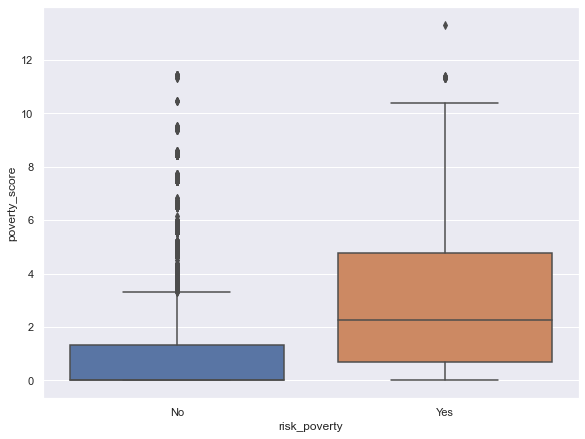

In [289]:
boxplot(x='risk_poverty', y='poverty_score', data=data)

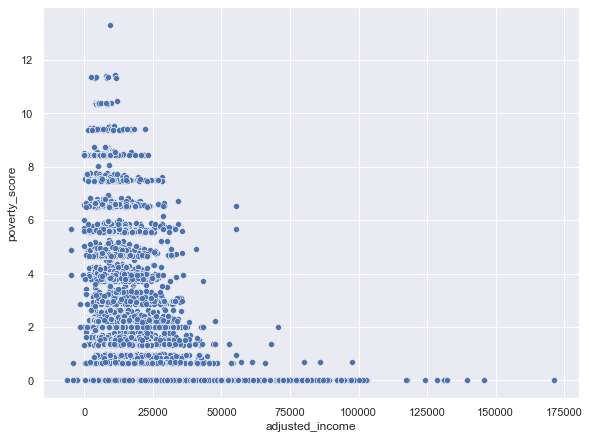

In [290]:
scatterplot(x='adjusted_income', y='poverty_score', data=data)

In [291]:
poverty_threshold

10832.6016

In [292]:
poverty_variables = data[data.columns[10:-1]].reset_index(drop=True)

In [293]:
for c in poverty_variables.columns:
    poverty_variables[c] = poverty_variables[c].map({'No': 1, 'Yes': 0})

In [294]:
poverty_variables.head()

,can_afford_new_clothes,can_afford_appropriate_footwear,can_afford_eating_outside,can_afford_leisure_activities,can_afford_weekly_treats,can_afford_holidays,can_afford_protein_diets,can_afford_unexpected_expenses,can_afford_telephone,can_afford_tv,can_afford_computer,can_afford_car,can_afford_washing_machine,can_afford_replace_furniture,can_pay_rent_on_time,can_pay_bills_on_time,can_pay_hire_purchases_on_time
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


In [295]:
poverty_variables_cross_freq = {}
for c1 in poverty_variables.columns:
    poverty_variables_cross_freq[c1] = []
    for c2 in poverty_variables.columns:
        freq = poverty_variables[poverty_variables[c2] == 1][c1].sum()/poverty_variables[c1].sum()
        poverty_variables_cross_freq[c1].append(freq)

In [296]:
poverty_variables_cross_freq

{'can_afford_new_clothes': [1.0,
  0.34593317583530203,
  0.6139048261896727,
  0.709753628079649,
  0.746540668241647,
  0.8903138710766115,
  0.22578467769152885,
  0.9213634829564631,
  0.011137360782990213,
  0.00809989875126561,
  0.2996962537968275,
  0.2254471819102261,
  0.016874789065136685,
  0.9139385757678029,
  0.14984812689841376,
  0.25784677691528857,
  0.04724940938238272],
 'can_afford_appropriate_footwear': [0.9284420289855072,
  1.0,
  0.7943840579710145,
  0.8233695652173914,
  0.8288043478260869,
  0.9067028985507246,
  0.322463768115942,
  0.9266304347826086,
  0.024456521739130436,
  0.019021739130434784,
  0.3496376811594203,
  0.29981884057971014,
  0.02355072463768116,
  0.9202898550724637,
  0.18840579710144928,
  0.28532608695652173,
  0.03351449275362319],
 'can_afford_eating_outside': [0.5122500704027034,
  0.24697268375105605,
  1.0,
  0.8422979442410589,
  0.785412559842298,
  0.9008729935229512,
  0.1796676992396508,
  0.8932695015488594,
  0.008729935

In [297]:
poverty_variables_cross_freq = pd.DataFrame(poverty_variables_cross_freq)

In [298]:
poverty_variables_cross_freq[''] = poverty_variables.columns
poverty_variables_cross_freq = poverty_variables_cross_freq.set_index('')
poverty_variables_cross_freq

,can_afford_new_clothes,can_afford_appropriate_footwear,can_afford_eating_outside,can_afford_leisure_activities,can_afford_weekly_treats,can_afford_holidays,can_afford_protein_diets,can_afford_unexpected_expenses,can_afford_telephone,can_afford_tv,can_afford_computer,can_afford_car,can_afford_washing_machine,can_afford_replace_furniture,can_pay_rent_on_time,can_pay_bills_on_time,can_pay_hire_purchases_on_time
,,,,,,,,,,,,,,,,,
can_afford_new_clothes,1.000000,0.928442,0.512250,0.380427,0.436981,0.197411,0.467505,0.206724,0.750000,0.685714,0.408276,0.376550,0.781250,0.223046,0.402904,0.401050,0.306346
can_afford_appropriate_footwear,0.345933,1.000000,0.246973,0.164436,0.180759,0.074908,0.248777,0.077465,0.613636,0.600000,0.177471,0.186584,0.406250,0.083683,0.188748,0.165354,0.080963
can_afford_eating_outside,0.613905,0.794384,1.000000,0.541064,0.550968,0.239392,0.445842,0.240194,0.704545,0.771429,0.454713,0.370349,0.750000,0.252615,0.385662,0.394226,0.301969
can_afford_leisure_activities,0.709754,0.823370,0.842298,1.000000,0.726590,0.347901,0.480783,0.344389,0.840909,0.800000,0.581609,0.497182,0.796875,0.365621,0.483666,0.512336,0.389497
can_afford_weekly_treats,0.746541,0.828804,0.785413,0.665340,1.000000,0.322832,0.533194,0.327427,0.818182,0.714286,0.558161,0.482525,0.796875,0.344700,0.520871,0.528084,0.431072
can_afford_holidays,0.890314,0.906703,0.900873,0.840991,0.852232,1.000000,0.835779,0.745419,0.977273,0.971429,0.878621,0.802706,1.000000,0.738489,0.795826,0.844619,0.851204
can_afford_protein_diets,0.225785,0.322464,0.179668,0.124457,0.150731,0.089501,1.000000,0.088217,0.545455,0.685714,0.188966,0.188839,0.671875,0.084425,0.186933,0.175853,0.113786
can_afford_unexpected_expenses,0.921363,0.926630,0.893270,0.822721,0.854208,0.736661,0.814116,1.000000,1.000000,0.942857,0.898391,0.858512,1.000000,0.768223,0.883848,0.909711,0.892779
can_afford_telephone,0.011137,0.024457,0.008730,0.006693,0.007112,0.003218,0.016771,0.003332,1.000000,0.142857,0.011954,0.012965,0.062500,0.003295,0.005445,0.006824,0.000000


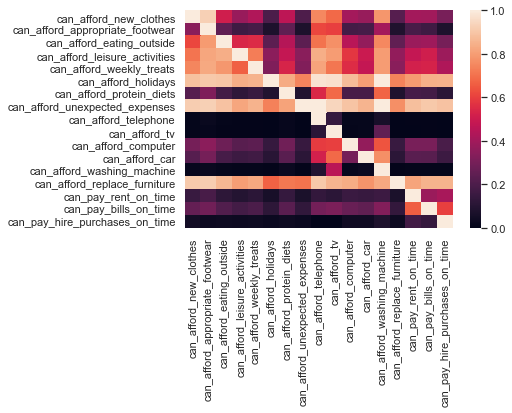

In [299]:
sns.heatmap(poverty_variables_cross_freq);

In [300]:
data.columns

Index(['id', 'weight', 'material_deprivation', 'annual_income',
       'consumption_unit', 'adjusted_income', 'minimum_income', 'kapteyn_line',
       'risk_poverty', 'id_head', 'can_afford_new_clothes',
       'can_afford_appropriate_footwear', 'can_afford_eating_outside',
       'can_afford_leisure_activities', 'can_afford_weekly_treats',
       'can_afford_holidays', 'can_afford_protein_diets',
       'can_afford_unexpected_expenses', 'can_afford_telephone',
       'can_afford_tv', 'can_afford_computer', 'can_afford_car',
       'can_afford_washing_machine', 'can_afford_replace_furniture',
       'can_pay_rent_on_time', 'can_pay_bills_on_time',
       'can_pay_hire_purchases_on_time', 'poverty_score'],
      dtype='object')

In [301]:
data = data.drop(['id_head', 'minimum_income', 'material_deprivation', 'annual_income', 'consumption_unit'], axis=1)

In [243]:
data.to_csv('target.csv')

In [4]:
for c in ilc.columns:
    print(c)

Personal ID
Personal cross-sectional weight
Year of birth
Sex
Basic activity status
Education at pre-school
Education at compulsory school
Childcare at centre-based services
Childcare at day-care centre
Childcare by a professional child-minder at child's home or at child-minder’s home
Childcare by grand-parents, other household members (outside parents), other relatives, friends or neighbours
Childrens’ cross-sectional weight for childcare
Living in household with low employement level
Living in household under risk of poverty
Marital status
Consensual Union
Country of birth
Citizenship
Current education activity
ISCED level currently attended
Year when highest level of education was attained
Highest ISCED level attained
Self-defined current economic status
Whether person has ever worked
Actively looking for a job
Available for work
Status in employment
Occupation
Number of hours usually worked per week in main job
Number of months spent at full-time work as employee
Number of months s